Check batch generator from image loader

In [43]:
# !cd ../../../ramp-workflow/ && python setup.py install

/usr/local/lib/python2.7/dist-packages/setuptools/dist.py:351: UserWarning: Normalizing '0.1.dev' to '0.1.dev0'
  normalized_version,
running install
running bdist_egg
running egg_info
writing requirements to ramp_workflow.egg-info/requires.txt
writing ramp_workflow.egg-info/PKG-INFO
writing top-level names to ramp_workflow.egg-info/top_level.txt
writing dependency_links to ramp_workflow.egg-info/dependency_links.txt
writing entry points to ramp_workflow.egg-info/entry_points.txt
reading manifest file 'ramp_workflow.egg-info/SOURCES.txt'
writing manifest file 'ramp_workflow.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying rampwf/utils/testing.py -> build/lib.linux-x86_64-2.7/rampwf/utils
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/rampwf
creating build/bdist.linux-x86_64/egg/rampwf/workflows
copying build/lib.linux-x86_64-2.7/rampwf/workflows/grid_feature_extractor.py -> build/bdis

byte-compiling build/bdist.linux-x86_64/egg/rampwf/score_types/detection/precision_recall.py to precision_recall.pyc
byte-compiling build/bdist.linux-x86_64/egg/rampwf/score_types/detection/util.py to util.pyc
byte-compiling build/bdist.linux-x86_64/egg/rampwf/score_types/negative_log_likelihood.py to negative_log_likelihood.pyc
byte-compiling build/bdist.linux-x86_64/egg/rampwf/score_types/accuracy.py to accuracy.pyc
byte-compiling build/bdist.linux-x86_64/egg/rampwf/score_types/clustering_efficiency.py to clustering_efficiency.pyc
byte-compiling build/bdist.linux-x86_64/egg/rampwf/score_types/balanced_accuracy.py to balanced_accuracy.pyc
byte-compiling build/bdist.linux-x86_64/egg/rampwf/cvs/__init__.py to __init__.pyc
byte-compiling build/bdist.linux-x86_64/egg/rampwf/cvs/clustering.py to clustering.pyc
byte-compiling build/bdist.linux-x86_64/egg/rampwf/cvs/time_series.py to time_series.pyc
byte-compiling build/bdist.linux-x86_64/egg/rampwf/utils/__init__.py to __init__.pyc
byte-com

In [120]:
# !pip install visdom

HAS_GPU: True
  Running setup.py bdist_wheel for visdom ... done
  Stored in directory: /root/.cache/pip/wheels/f5/3d/e1/96d697c44f66af633ce5314851ed42bb7f21afa4b4870f1d2e
  Running setup.py bdist_wheel for torchfile ... done
  Stored in directory: /root/.cache/pip/wheels/27/0a/74/650124cbc320716ff2a6566e711a0c84f871647b33ffc868f6
Successfully built visdom torchfile


In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function
import os, sys

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

sys.path.append("../submissions")
sys.path.append("..")

from rampwf.workflows.simplified_image_classifier import ImageLoader
from problem import get_cv, get_train_data, get_test_data

In [3]:
folder_X_array, y_array = get_train_data(path="..")
cv = list(get_cv(folder_X_array, y_array))

for fold_i, (train_is, valid_is) in enumerate(cv):

    folder, X_array = folder_X_array
    if train_is is None:
        train_is = slice(None, None, None)

    img_loader = ImageLoader(X_array[train_is], y_array[train_is], folder=folder, n_classes=403)

    
# img_loader.setup_backend('opencv')

In [116]:
from pytorch_SqueezeNet_finetunning_balanced_299.image_classifier import ImageLoaderProxyDataset, ResizedDataset
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

HAS_GPU: True


In [5]:
train_ds = ImageLoaderProxyDataset(img_loader)
train_ds = ResizedDataset(train_ds, output_size=(299, 299))
train_batches_ds = DataLoader(train_ds, batch_size=10, num_workers=1)

In [6]:
from collections import defaultdict, Hashable
total_y_stats = defaultdict(int)
cnt = 0
display_freq = 100
display_total = True

for i, (batch_x, batch_y) in enumerate(train_batches_ds):
    y_stats = defaultdict(int)
    for y in batch_y:
        if isinstance(y, Hashable):
            total_y_stats[y] += 1 
            y_stats[y] += 1
                    
    if (cnt % display_freq) == 0:
        print("\n%i | Labels counts: " % cnt)
        print("  current: | ", end='')
        for k in y_stats:
            print("'{}': {} |".format(str(k), y_stats[k]), end=' ')
        print('')
        if display_total:
            print("    total: ")
            for j, k in enumerate(total_y_stats):
                if j > 0 and j % 6 == 0:
                    print("")
                print("'{0: >3}': {1: >5}".format(k, total_y_stats[k]), end=' | ')
            print('')                    
    cnt += 1
    
    if i == 200:
        break


0 | Labels counts: 
  current: | '1': 1 | '163': 1 | '4': 1 | '40': 1 | '109': 1 | '179': 1 | '84': 1 | '57': 1 | '159': 2 | 
    total: 
'  1':     1 | '163':     1 | '  4':     1 | ' 40':     1 | '109':     1 | '179':     1 | 
' 84':     1 | ' 57':     1 | '159':     2 | 

100 | Labels counts: 
  current: | '160': 1 | '172': 1 | '76': 1 | '49': 1 | '20': 1 | '86': 1 | '300': 1 | '57': 1 | '124': 1 | '159': 1 | 
    total: 
'  0':     4 | '  1':     7 | '  3':    14 | '  4':     1 | '  5':     7 | '  7':    16 | 
'  8':     5 | '  9':     1 | ' 10':     2 | ' 11':     1 | ' 14':     1 | ' 15':     6 | 
' 16':     4 | ' 18':     3 | ' 19':     1 | ' 20':    10 | ' 21':     2 | ' 22':     4 | 
' 23':     2 | ' 24':     1 | ' 25':     4 | ' 27':    14 | ' 29':     1 | ' 31':     1 | 
' 32':     1 | ' 33':     8 | ' 34':     3 | ' 35':    14 | ' 36':     1 | ' 37':     1 | 
' 38':     2 | ' 39':     6 | ' 40':     2 | ' 41':     1 | ' 42':     8 | ' 44':     2 | 
' 45':     1 | ' 46':   

### Random under+over sampling

In [6]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [11]:
import numpy as np

def under_over_sample(targets, undersampling_threshold=350):
    # Under+Oversample training data:
    # - undersample randomly images that count is larger a threshold
    # - oversample randomly all images

    class_counts = np.zeros((403, ), dtype=np.int)
    for class_index in targets:
        class_counts[class_index] += 1

    classes_to_undersample = np.where(class_counts > undersampling_threshold)[0]

    indices_to_undersample = np.where(np.isin(targets, classes_to_undersample))[0]
    indices_to_oversample = np.where(~np.isin(targets, classes_to_undersample))[0]
    
    rs = RandomUnderSampler()
    indices_undersampled, new_targets = rs.fit_sample(indices_to_undersample[:, None],
                                                      targets[indices_to_undersample])
    indices_undersampled = indices_undersampled.ravel()
    rs = RandomOverSampler()
    new_indices = np.concatenate((indices_undersampled, indices_to_oversample))
    new_targets = np.concatenate((new_targets, targets[indices_to_oversample]))

    new_indices, new_targets = rs.fit_sample(new_indices[:, None], new_targets)
    new_indices = new_indices.ravel()
    return new_indices

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
sssplit = StratifiedShuffleSplit(test_size=0.1, random_state=12345)

train_indices, val_indices = next(sssplit.split(img_loader.X_array, img_loader.y_array))

In [8]:

import matplotlib.pyplot as plt
%matplotlib inline

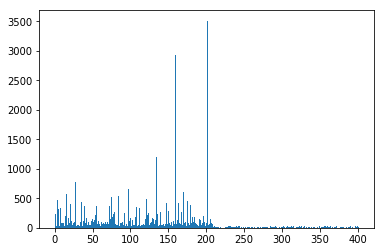

In [9]:
_ = plt.hist(img_loader.y_array[train_indices], bins=403)

In [19]:
counts = np.bincount(img_loader.y_array[train_indices])
counts[202], counts[0] 

(3510, 214)

In [83]:
targets = img_loader.y_array[train_indices].copy()
undersampling_threshold = 350

class_counts = np.bincount(targets)

classes_to_undersample = np.where(class_counts > undersampling_threshold)[0]
indices_to_undersample = np.where(np.isin(targets, classes_to_undersample))[0]
indices_to_oversample = np.where(~np.isin(targets, classes_to_undersample))[0]

rs = RandomUnderSampler('not minority')
indices_undersampled, new_targets = rs.fit_sample(indices_to_undersample[:, None], targets[indices_to_undersample])
indices_undersampled = indices_undersampled.ravel()# rs = RandomOverSampler()

In [84]:
train_indices.shape

(42012,)

In [85]:
indices_to_undersample.shape, targets[indices_to_undersample].shape

((21253,), (21253,))

In [86]:
set(indices_undersampled) & set(indices_to_undersample) == set(indices_undersampled)

True

In [87]:
len(set(indices_undersampled)), len(indices_undersampled)

(9720, 9720)

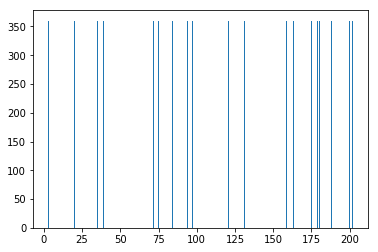

In [100]:
_ = plt.hist(new_targets, bins=403)

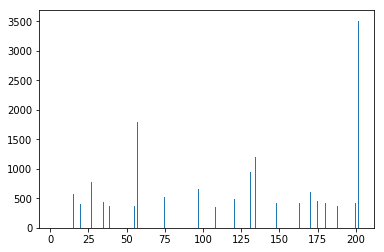

In [94]:
_ = plt.hist(targets[indices_to_undersample], bins=403)

In [99]:
(np.unique(targets[indices_to_undersample]) == np.unique(new_targets)).all()

True

In [105]:
new_indices = np.concatenate((indices_undersampled, indices_to_oversample))
new_targets = np.concatenate((new_targets, targets[indices_to_oversample]))

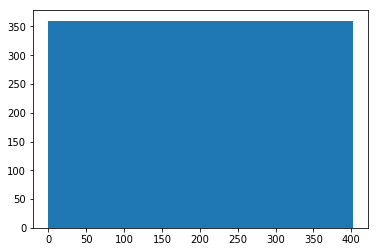

In [115]:
_ = plt.hist(img_loader.y_array[new_train_indices], bins=403)

In [109]:
balanced_indices = under_over_sample(img_loader.y_array[train_indices], undersampling_threshold=350)

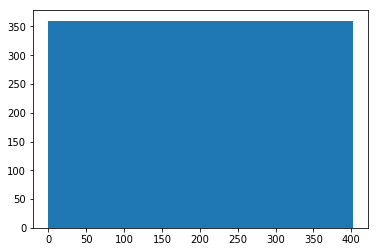

In [110]:
_ = plt.hist(img_loader.y_array[train_indices][balanced_indices], bins=403)

In [117]:
new_train_indices = train_indices[balanced_indices]

In [118]:
train_sampler = SubsetRandomSampler(new_train_indices)

train_ds = ImageLoaderProxyDataset(img_loader)
train_ds = ResizedDataset(train_ds, output_size=(299, 299))
train_batches_ds = DataLoader(train_ds, batch_size=10, num_workers=1, sampler=train_sampler)

In [119]:
from collections import defaultdict, Hashable
total_y_stats = defaultdict(int)
cnt = 0
display_freq = 100
display_total = True

for i, (batch_x, batch_y) in enumerate(train_batches_ds):
    y_stats = defaultdict(int)
    for y in batch_y:
        if isinstance(y, Hashable):
            total_y_stats[y] += 1 
            y_stats[y] += 1
                    
    if (cnt % display_freq) == 0:
        print("\n%i | Labels counts: " % cnt)
        print("  current: | ", end='')
        for k in y_stats:
            print("'{}': {} |".format(str(k), y_stats[k]), end=' ')
        print('')
        if display_total:
            print("    total: ")
            for j, k in enumerate(total_y_stats):
                if j > 0 and j % 6 == 0:
                    print("")
                print("'{0: >3}': {1: >5}".format(k, total_y_stats[k]), end=' | ')
            print('')                    
    cnt += 1
    
    if i == 200:
        break


0 | Labels counts: 
  current: | '19': 1 | '2': 1 | '73': 1 | '202': 1 | '275': 1 | '246': 1 | '119': 1 | '312': 1 | '122': 1 | '255': 1 | 
    total: 
' 19':     1 | '  2':     1 | ' 73':     1 | '202':     1 | '275':     1 | '246':     1 | 
'119':     1 | '312':     1 | '122':     1 | '255':     1 | 

100 | Labels counts: 
  current: | '97': 1 | '356': 1 | '229': 1 | '327': 1 | '12': 1 | '77': 1 | '369': 1 | '373': 1 | '150': 1 | '91': 1 | 
    total: 
'  2':     3 | '  3':     1 | '  4':     2 | '  5':     2 | '  6':     4 | '  8':     3 | 
'  9':     5 | ' 10':     1 | ' 11':     3 | ' 12':     4 | ' 13':     4 | ' 14':     3 | 
' 15':     2 | ' 17':     1 | ' 18':     2 | ' 19':     4 | ' 20':     5 | ' 21':     1 | 
' 22':     3 | ' 23':     2 | ' 24':     1 | ' 25':     1 | ' 26':     2 | ' 28':     2 | 
' 29':     1 | ' 30':     3 | ' 31':     1 | ' 33':     2 | ' 34':     1 | ' 35':     2 | 
' 36':     4 | ' 37':     2 | ' 39':     4 | ' 40':     3 | ' 42':     6 | ' 43':    

Another method 

In [10]:
sample_weights = np.zeros_like(img_loader.y_array, dtype=np.float)
for i in range(403):
    sample_weights[img_loader.y_array == i] = class_weights[i]

In [11]:
from torch.utils.data.sampler import WeightedRandomSampler

In [12]:
sampler = WeightedRandomSampler(sample_weights, num_samples=len(img_loader))

In [13]:
train_ds = ImageLoaderProxyDataset(img_loader)
train_ds = ResizedDataset(train_ds, output_size=(299, 299))
train_batches_ds = DataLoader(train_ds, batch_size=10, num_workers=1, sampler=sampler)

In [14]:
from collections import defaultdict, Hashable
total_y_stats = defaultdict(int)
cnt = 0
display_freq = 5000
display_total = True

for i, (batch_x, batch_y) in enumerate(train_batches_ds):
    y_stats = defaultdict(int)
    for y in batch_y:
        if isinstance(y, Hashable):
            total_y_stats[y] += 1 
            y_stats[y] += 1
                    
    if (cnt % display_freq) == 0:
        print("\n%i | Labels counts: " % cnt)
        print("  current: | ", end='')
        for k in y_stats:
            print("'{}': {} |".format(str(k), y_stats[k]), end=' ')
        print('')
        if display_total:
            print("    total: ")
            for j, k in enumerate(total_y_stats):
                if j > 0 and j % 6 == 0:
                    print("")
                print("'{0: >3}': {1: >5}".format(k, total_y_stats[k]), end=' | ')
            print('')                    
    cnt += 1
    
#     if i == 500:
#         break


0 | Labels counts: 
  current: | '323': 1 | '373': 1 | '107': 1 | '77': 1 | '272': 1 | '81': 1 | '171': 1 | '182': 1 | '119': 1 | '351': 1 | 
    total: 
'323':     1 | '373':     1 | '107':     1 | ' 77':     1 | '272':     1 | ' 81':     1 | 
'171':     1 | '182':     1 | '119':     1 | '351':     1 | 


In [16]:
print("    total: ")
for j, k in enumerate(total_y_stats):
    if j > 0 and j % 6 == 0:
        print("")
    print("'{0: >3}': {1: >5}".format(k, total_y_stats[k]), end=' | ')
print('')                    


    total: 
'  0':   143 | '  1':   112 | '  2':   122 | '  3':   110 | '  4':   131 | '  5':   133 | 
'  6':   101 | '  7':   111 | '  8':   104 | '  9':   102 | ' 10':   129 | ' 11':   124 | 
' 12':    97 | ' 13':   112 | ' 14':   116 | ' 15':   129 | ' 16':   122 | ' 17':   126 | 
' 18':   111 | ' 19':   128 | ' 20':   105 | ' 21':   116 | ' 22':    96 | ' 23':    88 | 
' 24':   122 | ' 25':   102 | ' 26':   119 | ' 27':   115 | ' 28':   116 | ' 29':   103 | 
' 30':   109 | ' 31':   124 | ' 32':   114 | ' 33':   122 | ' 34':   117 | ' 35':   108 | 
' 36':   123 | ' 37':   104 | ' 38':   125 | ' 39':    98 | ' 40':   106 | ' 41':   100 | 
' 42':   120 | ' 43':   106 | ' 44':   124 | ' 45':   104 | ' 46':   116 | ' 47':   110 | 
' 48':   122 | ' 49':   119 | ' 50':   117 | ' 51':   113 | ' 52':   117 | ' 53':   128 | 
' 54':   125 | ' 55':   133 | ' 56':   126 | ' 57':   114 | ' 58':   104 | ' 59':   100 | 
' 60':   128 | ' 61':    97 | ' 62':   109 | ' 63':   109 | ' 64':   113 | ' 6

In [15]:
set(range(403)) - set(total_y_stats.keys()) 

set()

In [109]:
np.argsort(class_weights)[::-1]

array([259, 335, 251, 223, 299, 295, 334, 387, 253, 286, 351, 345, 296,
       248, 356, 222, 317, 349, 254, 319, 366, 246, 328, 241, 374, 338,
       220, 395, 283, 265, 284, 267, 377, 327, 396, 237, 318, 393, 375,
       341, 218, 307, 346, 305, 271, 303, 385, 273, 383, 369, 224, 332,
       263, 221, 209, 245, 355, 250, 291, 367, 219, 281, 321, 320, 282,
       257, 278, 262, 402, 212, 386, 378, 360, 333, 322, 363, 311, 274,
       325, 343, 340, 210, 384, 234, 372, 258, 401, 279, 269, 287, 247,
       229, 371, 364, 342, 252, 344, 290, 266, 382, 329, 394, 352, 242,
       337, 312, 233, 275, 272, 399, 339, 264, 390, 354, 227, 359, 235,
       362, 294, 277, 368, 268, 256, 216, 331, 239, 306, 217, 238, 260,
       276, 300, 336, 379, 381, 388, 315, 304, 353, 280, 289, 226, 323,
       215, 228, 380, 288, 376, 314, 389, 214, 293, 392, 347, 309, 397,
       297, 255, 348, 236, 370, 270, 298, 225, 213, 301, 261, 310, 400,
       292, 350, 316, 240, 308, 330, 398, 357, 365, 243, 326, 23

In [108]:
class_weights[139], class_weights[258]

(1097.9332589167968, 10749.618465543474)

In [9]:
class ExampleDataset:
    
    def __init__(self, data_points):
        self.num_samples = len(data_points)
        self.data_points = data_points
        
    def __len__(self):
        return self.num_samples
    
    def __getitem__(self, index):
        return self.data_points[index]

In [10]:
dpoints = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    2, 2, 2, 2, 2, 
    3, 3, 3, 
    4, 4,
])

np.random.shuffle(dpoints)

In [68]:
counts = np.bincount(dpoints)
counts

array([42, 15,  5,  3,  2])

In [85]:
class_weights = 1.0 / np.log10(counts * 1.0 / np.sum(counts) + 1.0)

In [86]:
class_weights

array([  4.7314501 ,  11.39743368,  31.99212356,  52.56728829,  78.28224925])

In [87]:
sample_weights = np.zeros_like(dpoints, dtype=np.float)
for i in range(5):
    sample_weights[dpoints == i] = class_weights[i]

In [88]:
sampler = WeightedRandomSampler(sample_weights, num_samples=len(dpoints))

In [89]:
example_ds = ExampleDataset(dpoints)
train_batches_ds = DataLoader(example_ds, batch_size=10, num_workers=1, sampler=sampler)

In [91]:
list(sampler)

[63,
 50,
 33,
 7,
 24,
 12,
 60,
 66,
 66,
 51,
 60,
 51,
 62,
 24,
 63,
 28,
 63,
 63,
 6,
 66,
 12,
 7,
 63,
 19,
 25,
 3,
 24,
 63,
 43,
 50,
 66,
 43,
 63,
 7,
 40,
 26,
 66,
 66,
 55,
 25,
 2,
 39,
 36,
 24,
 16,
 7,
 12,
 44,
 63,
 43,
 66,
 63,
 7,
 5,
 63,
 43,
 45,
 12,
 63,
 63,
 66,
 12,
 50,
 49,
 7,
 7,
 50]

In [92]:
from collections import defaultdict, Hashable
total_y_stats = defaultdict(int)
cnt = 0
display_freq = 1
display_total = True

for i, batch_y in enumerate(train_batches_ds):
    y_stats = defaultdict(int)
    for y in batch_y:
        if isinstance(y, Hashable):
            total_y_stats[y] += 1 
            y_stats[y] += 1
                    
    if (cnt % display_freq) == 0:
        print("\n%i | Labels counts: " % cnt)
        print("  current: | ", end='')
        for k in y_stats:
            print("'{}': {} |".format(str(k), y_stats[k]), end=' ')
        print('')
        if display_total:
            print("    total: ")
            for j, k in enumerate(total_y_stats):
                if j > 0 and j % 6 == 0:
                    print("")
                print("'{0: >3}': {1: >5}".format(k, total_y_stats[k]), end=' | ')
            print('')                    
    cnt += 1
    
    if i == 200:
        break


0 | Labels counts: 
  current: | '0': 4 | '1': 2 | '2': 1 | '3': 1 | '4': 2 | 
    total: 
'  0':     4 | '  1':     2 | '  2':     1 | '  3':     1 | '  4':     2 | 

1 | Labels counts: 
  current: | '0': 3 | '1': 2 | '2': 2 | '4': 3 | 
    total: 
'  0':     7 | '  1':     4 | '  2':     3 | '  3':     1 | '  4':     5 | 

2 | Labels counts: 
  current: | '0': 1 | '1': 2 | '2': 3 | '3': 2 | '4': 2 | 
    total: 
'  0':     8 | '  1':     6 | '  2':     6 | '  3':     3 | '  4':     7 | 

3 | Labels counts: 
  current: | '0': 2 | '1': 3 | '2': 2 | '3': 2 | '4': 1 | 
    total: 
'  0':    10 | '  1':     9 | '  2':     8 | '  3':     5 | '  4':     8 | 

4 | Labels counts: 
  current: | '0': 1 | '1': 5 | '2': 3 | '4': 1 | 
    total: 
'  0':    11 | '  1':    14 | '  2':    11 | '  3':     5 | '  4':     9 | 

5 | Labels counts: 
  current: | '0': 3 | '1': 2 | '2': 2 | '3': 2 | '4': 1 | 
    total: 
'  0':    14 | '  1':    16 | '  2':    13 | '  3':     7 | '  4':    10 | 

6 | Label

In [13]:
gamma1 = 0.3567
gamma2 = 0.789
gamma3 = 0.5
gamma4 = 0.2345
epochs = np.arange(12)
lr_init = 0.000123

step = 2.0

lrs1 = lr_init * gamma1 ** epochs
lrs2 = lr_init * gamma2 ** epochs
lrs21 = lr_init * 10 * gamma2 ** epochs
lrs3 = lr_init * gamma3 ** epochs
lrs4 = lr_init * gamma4 ** (epochs // step)

In [14]:
import matplotlib.pylab as plt
%matplotlib inline

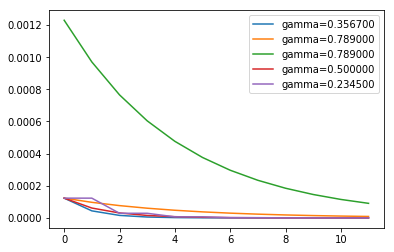

In [15]:
plt.plot(epochs, lrs1, label='gamma=%f' % gamma1)
plt.plot(epochs, lrs2, label='gamma=%f' % gamma2)
plt.plot(epochs, lrs21, label='gamma=%f' % gamma2)
plt.plot(epochs, lrs3, label='gamma=%f' % gamma3)
plt.plot(epochs, lrs4, label='gamma=%f' % gamma4)
plt.legend()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
x = []
y = []
lls = [20, 15, 14, 10, 7]
for i, l in enumerate(['a', 'b', 'c', 'd', 'e']):
    for k in range(lls[i]):
        x.append(l + str(k))
        y.append(i)

In [25]:
sssplit = StratifiedShuffleSplit(test_size=0.1, random_state=12345)
train_indices, val_indices = next(sssplit.split(x, y))

In [26]:
x_train = np.array(x)[train_indices]
y_train = np.array(y)[train_indices]

In [27]:
x_train

array(['c8', 'b5', 'a15', 'c1', 'c2', 'd7', 'b13', 'a6', 'c6', 'a4', 'a9',
       'c13', 'c11', 'c0', 'a19', 'a11', 'd8', 'd3', 'a17', 'b11', 'e1',
       'b7', 'a18', 'c5', 'e4', 'b0', 'b9', 'e5', 'e2', 'b10', 'a12', 'c9',
       'a8', 'd4', 'b3', 'a7', 'a16', 'a0', 'd0', 'a3', 'c4', 'c10', 'b6',
       'c12', 'd9', 'a14', 'd1', 'b8', 'a13', 'a1', 'a10', 'b4', 'b14',
       'd2', 'e3', 'd6', 'b12', 'c7', 'e6'],
      dtype='|S3')

In [ ]:
# class RandomUniformSampler(object):
    
#     def __init__(self, targets):
#         self.targets = targets
#         self.num_samples = len(targets)
#         self.weights = 
        
#     def __iter__(self):
#         return iter(torch.multinomial(self.weights, self.num_samples, self.replacement))

#     def __len__(self):
#         return self.num_samples

    

In [32]:
counts = np.bincount(y_train)
class_weights = 1.0 / np.log10(counts * 1.0 / np.sum(counts) + 1.0)
sample_weights = np.zeros_like(y_train, dtype=np.float)
for i in range(len(class_weights)):
    sample_weights[y_train == i] = class_weights[i]

In [33]:
weighted_sampler = WeightedRandomSampler(sample_weights, num_samples=len(y_train))

In [35]:
for index in list(weighted_sampler):
    y = y_train[index]
    x = x_train[index]
    print(x, y)


d9 3
b10 1
e1 4
c2 2
d3 3
b8 1
c5 2
c13 2
a9 0
d6 3
d2 3
a0 0
e2 4
d4 3
a13 0
e2 4
d7 3
b8 1
d4 3
d7 3
d6 3
d9 3
a1 0
c12 2
c8 2
b7 1
c5 2
b11 1
d4 3
d0 3
d6 3
c11 2
e6 4
a7 0
c9 2
e1 4
b7 1
b10 1
e2 4
e4 4
b12 1
c4 2
e1 4
b14 1
a16 0
d3 3
e5 4
b7 1
d4 3
a6 0
a1 0
e1 4
e1 4
d0 3
a13 0
d8 3
c13 2
e6 4
b6 1
